In [1]:
from path import Path
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Exploración básica

In [2]:
path = Path('../input')

In [3]:
! ls {path}

README.md             test.csv              weather_train.csv
building_metadata.csv train.csv
sample_submission.csv weather_test.csv


### Datos de entrenamiento

In [4]:
train_df      = pd.read_csv(path/'train.csv')
train_weather = pd.read_csv(path/"weather_train.csv")

### Datos de test

In [5]:
test_df       = pd.read_csv(path/'test.csv')
test_weather  = pd.read_csv(path/"weather_test.csv")

### Edificios

In [6]:
building_df   = pd.read_csv(path/'building_metadata.csv')

### Opcional: Reducir memoria

In [7]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

train_df = reduce_mem_usage(train_df)
test_df  = reduce_mem_usage(test_df)

train_weather = reduce_mem_usage(train_weather)
test_weather  = reduce_mem_usage(test_weather)

building_df = reduce_mem_usage(building_df)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)


### ¿Qué hay en los CSVs?

In [8]:
display(train_df.head())
display( test_df.head())

display(train_weather.head())
display( test_weather.head())

display(building_df.head())

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,0,2017-01-01 01:00:00,17.796875,2.0,12.796875,0.0,1022.0,130.0,3.099609
2,0,2017-01-01 02:00:00,16.093750,0.0,12.796875,0.0,1022.0,140.0,3.099609
3,0,2017-01-01 03:00:00,17.203125,0.0,13.296875,0.0,1022.0,140.0,3.099609
4,0,2017-01-01 04:00:00,16.703125,2.0,13.296875,0.0,1022.5,130.0,2.599609


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


### ¿Hay NaNs? ¿Faltan datos?

In [9]:
def check_missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent missing'])
print("Train")
display(check_missing(train_df))
display(check_missing(train_weather))
print("Test")
display(check_missing(test_df))
display(check_missing(test_weather))
print("Buildings")
display(check_missing(building_df))


Train


,Total,Percent missing
meter_reading,0,0.0
timestamp,0,0.0
meter,0,0.0
building_id,0,0.0


,Total,Percent missing
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496
dew_temperature,113,0.080845
air_temperature,55,0.039350
timestamp,0,0.000000
site_id,0,0.000000


Test


,Total,Percent missing
timestamp,0,0.0
meter,0,0.0
building_id,0,0.0
row_id,0,0.0


,Total,Percent missing
cloud_coverage,140448,50.658808
precip_depth_1_hr,95588,34.478057
sea_level_pressure,21265,7.670167
wind_direction,12370,4.461790
wind_speed,460,0.165919
dew_temperature,327,0.117947
air_temperature,104,0.037512
timestamp,0,0.000000
site_id,0,0.000000


Buildings


,Total,Percent missing
floor_count,1094,75.500345
year_built,774,53.416149
square_feet,0,0.000000
primary_use,0,0.000000
building_id,0,0.000000
site_id,0,0.000000


### Distribución de la variable objetivo: meter_reading

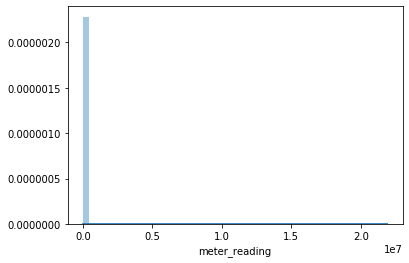

In [10]:
sns.distplot(train_df['meter_reading'])

🤔

In [11]:
n_train = train_df.shape[0]
n_zeros = train_df[train_df['meter_reading']==0]['meter_reading'].shape[0]
print(f'{n_zeros} zeros ({100*n_zeros/n_train:.2f}%)')

1873976 zeros (9.27%)


In [12]:
np.histogram(train_df['meter_reading'].values,bins=20)

(array([20213045,      153,      197,      125,      123,      355,
             422,      116,       58,       59,       34,       43,
             104,      177,      370,      165,      174,      249,
              95,       36]),
 array([       0.,  1095235.,  2190470.,  3285705.,  4380940.,  5476175.,
         6571410.,  7666645.,  8761880.,  9857115., 10952350., 12047585.,
        13142820., 14238055., 15333290., 16428525., 17523760., 18618996.,
        19714230., 20809464., 21904700.], dtype=float32))

In [13]:
# 99% of data below:
q_99 = train_df['meter_reading'].quantile(0.99)
print(q_99)

5449.22021484375


### Veamos distribución

In [27]:
train_df_q99 = train_df[train_df['meter_reading']<=q_99]

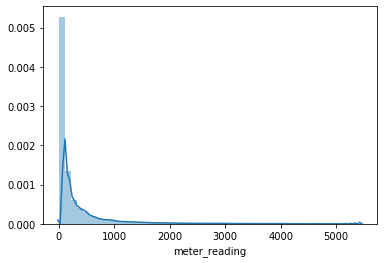

In [28]:
sns.distplot(train_df_q99['meter_reading'])

### Distribución si la transformamos con log1p

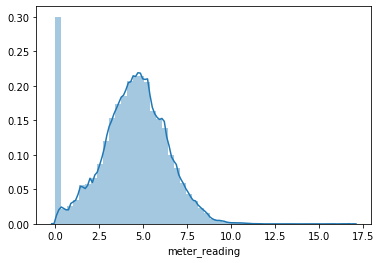

In [17]:
sns.distplot(np.log1p(train_df['meter_reading']))

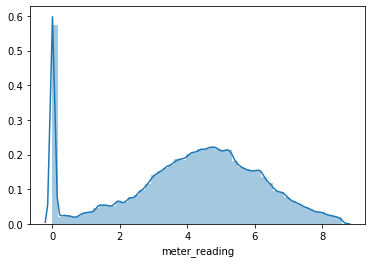

In [29]:
sns.distplot(np.log1p(train_df_q99['meter_reading']))

### Fechas

In [30]:
TS = 'timestamp'
print(f'Train from {train_df[TS].min()} to {train_df[TS].max()}')
print(f'Test  from { test_df[TS].min()} to { test_df[TS].max()}')

Train from 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Test  from 2017-01-01 00:00:00 to 2018-12-31 23:00:00


### Edificios

In [31]:
all_buildings = building_df['building_id'].values
print(f"Number of buildings: {len(all_buildings)}")

Number of buildings: 1449


In [32]:
train_buildings, test_buildings = np.unique(train_df['building_id'].values), np.unique(test_df['building_id'].values)

In [33]:
# SAME buildings in test and train
np.setdiff1d(all_buildings, train_buildings), np.setdiff1d(all_buildings, test_buildings)

(array([], dtype=int16), array([], dtype=int16))

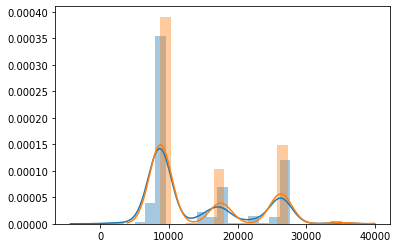

In [34]:
# home many observations per building
# train
train_samples_per_building = [len(g) for i,g in train_df.groupby('building_id')]
test_samples_per_building  = [len(g) for i,g in  test_df.groupby('building_id')]

sns.distplot(          train_samples_per_building)
sns.distplot(  np.array(test_samples_per_building)/2) # bc 2x samples in test

In [35]:
bid = np.argmin(train_samples_per_building)
display(train_df[train_df['building_id']==bid])
bid = np.argmax(train_samples_per_building) # 366*24*4
display(train_df[train_df['building_id']==bid])

,building_id,meter,timestamp,meter_reading
19085659,403,0,2016-12-12 01:00:00,44.349998
19088023,403,0,2016-12-12 02:00:00,45.450001
19090387,403,0,2016-12-12 03:00:00,44.820000
19092751,403,0,2016-12-12 04:00:00,45.110001
19095115,403,0,2016-12-12 05:00:00,44.730000
...,...,...,...,...
20204864,403,0,2016-12-31 19:00:00,43.660000
20207227,403,0,2016-12-31 20:00:00,43.639999
20209593,403,0,2016-12-31 21:00:00,43.889999
20211958,403,0,2016-12-31 22:00:00,44.369999


,building_id,meter,timestamp,meter_reading
1856,1249,0,2016-01-01 00:00:00,299.000000
1857,1249,1,2016-01-01 00:00:00,695.554993
1858,1249,2,2016-01-01 00:00:00,899.640015
1859,1249,3,2016-01-01 00:00:00,840.861023
4152,1249,0,2016-01-01 01:00:00,298.000000
...,...,...,...,...
20213282,1249,3,2016-12-31 22:00:00,997.559998
20215644,1249,0,2016-12-31 23:00:00,370.000000
20215645,1249,1,2016-12-31 23:00:00,653.013000
20215646,1249,2,2016-12-31 23:00:00,1065.640015


### Evolución por fecha

In [36]:
train_df_q99

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000000
1,1,0,2016-01-01 00:00:00,0.000000
2,2,0,2016-01-01 00:00:00,0.000000
3,3,0,2016-01-01 00:00:00,0.000000
4,4,0,2016-01-01 00:00:00,0.000000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750000
20216096,1445,0,2016-12-31 23:00:00,4.825000
20216097,1446,0,2016-12-31 23:00:00,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.574997


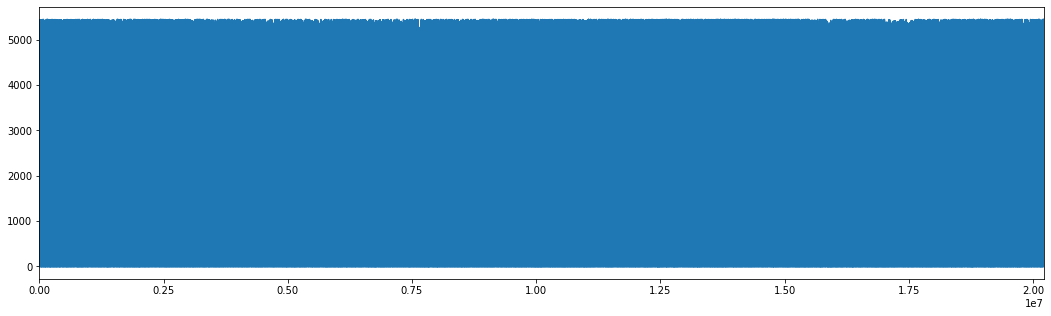

In [37]:
plt.figure(figsize = (18,5))
train_df_q99['meter_reading'].plot()

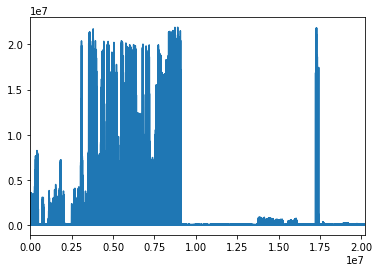

In [40]:
# Outliers FTW
train_df['meter_reading'].plot()

### Ejercicio: ¿Quienes son los outliers?